# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

from sklearn import metrics
from sklearn.metrics import accuracy_score

sns.set(style='ticks')
%matplotlib inline

# Loading Dataset

In [2]:
dataset = pd.read_csv('Data - Parkinsons')
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# # Studying the data distribution in each attribute

In [3]:
dataset.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [4]:
dataset.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
dataset.shape

(195, 24)

## EDA

In [6]:
# Dispalying the descriptive statistics describe each attribute
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Univariate and BiVariate Analysis of Different Attributes

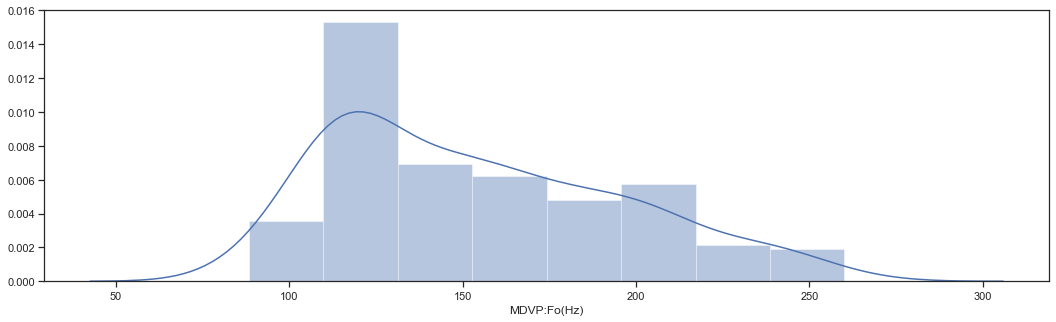

In [7]:
plt.figure(figsize=(18,5))
sns.set_color_codes()
sns.distplot(dataset["MDVP:Fo(Hz)"])

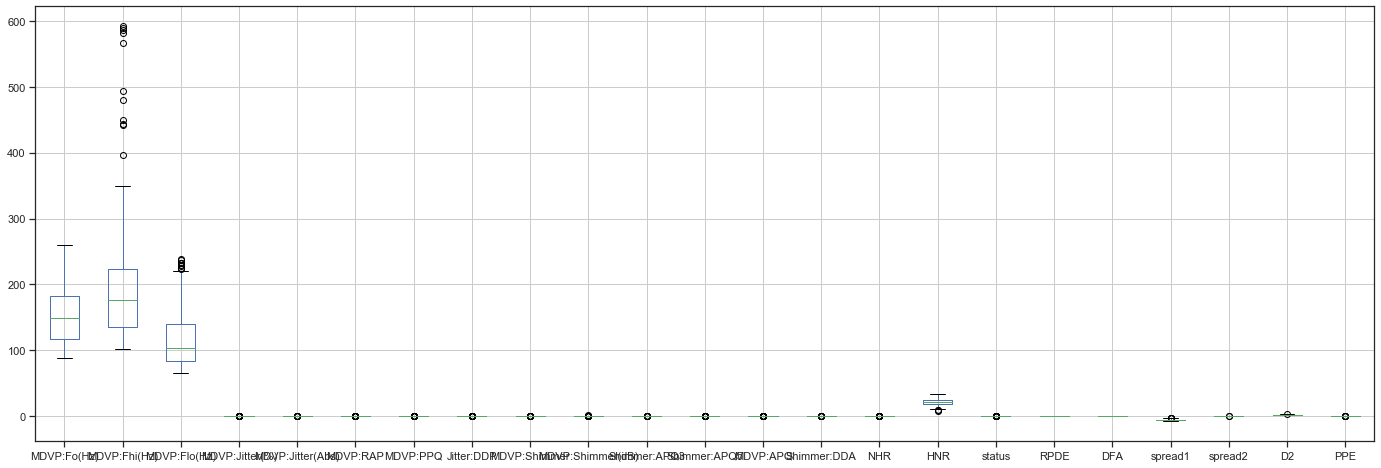

In [8]:
dataset.boxplot(figsize=(24,8))

From the above box plots, we observe that there are less outliers. So, the model will not be affected by the outliers.

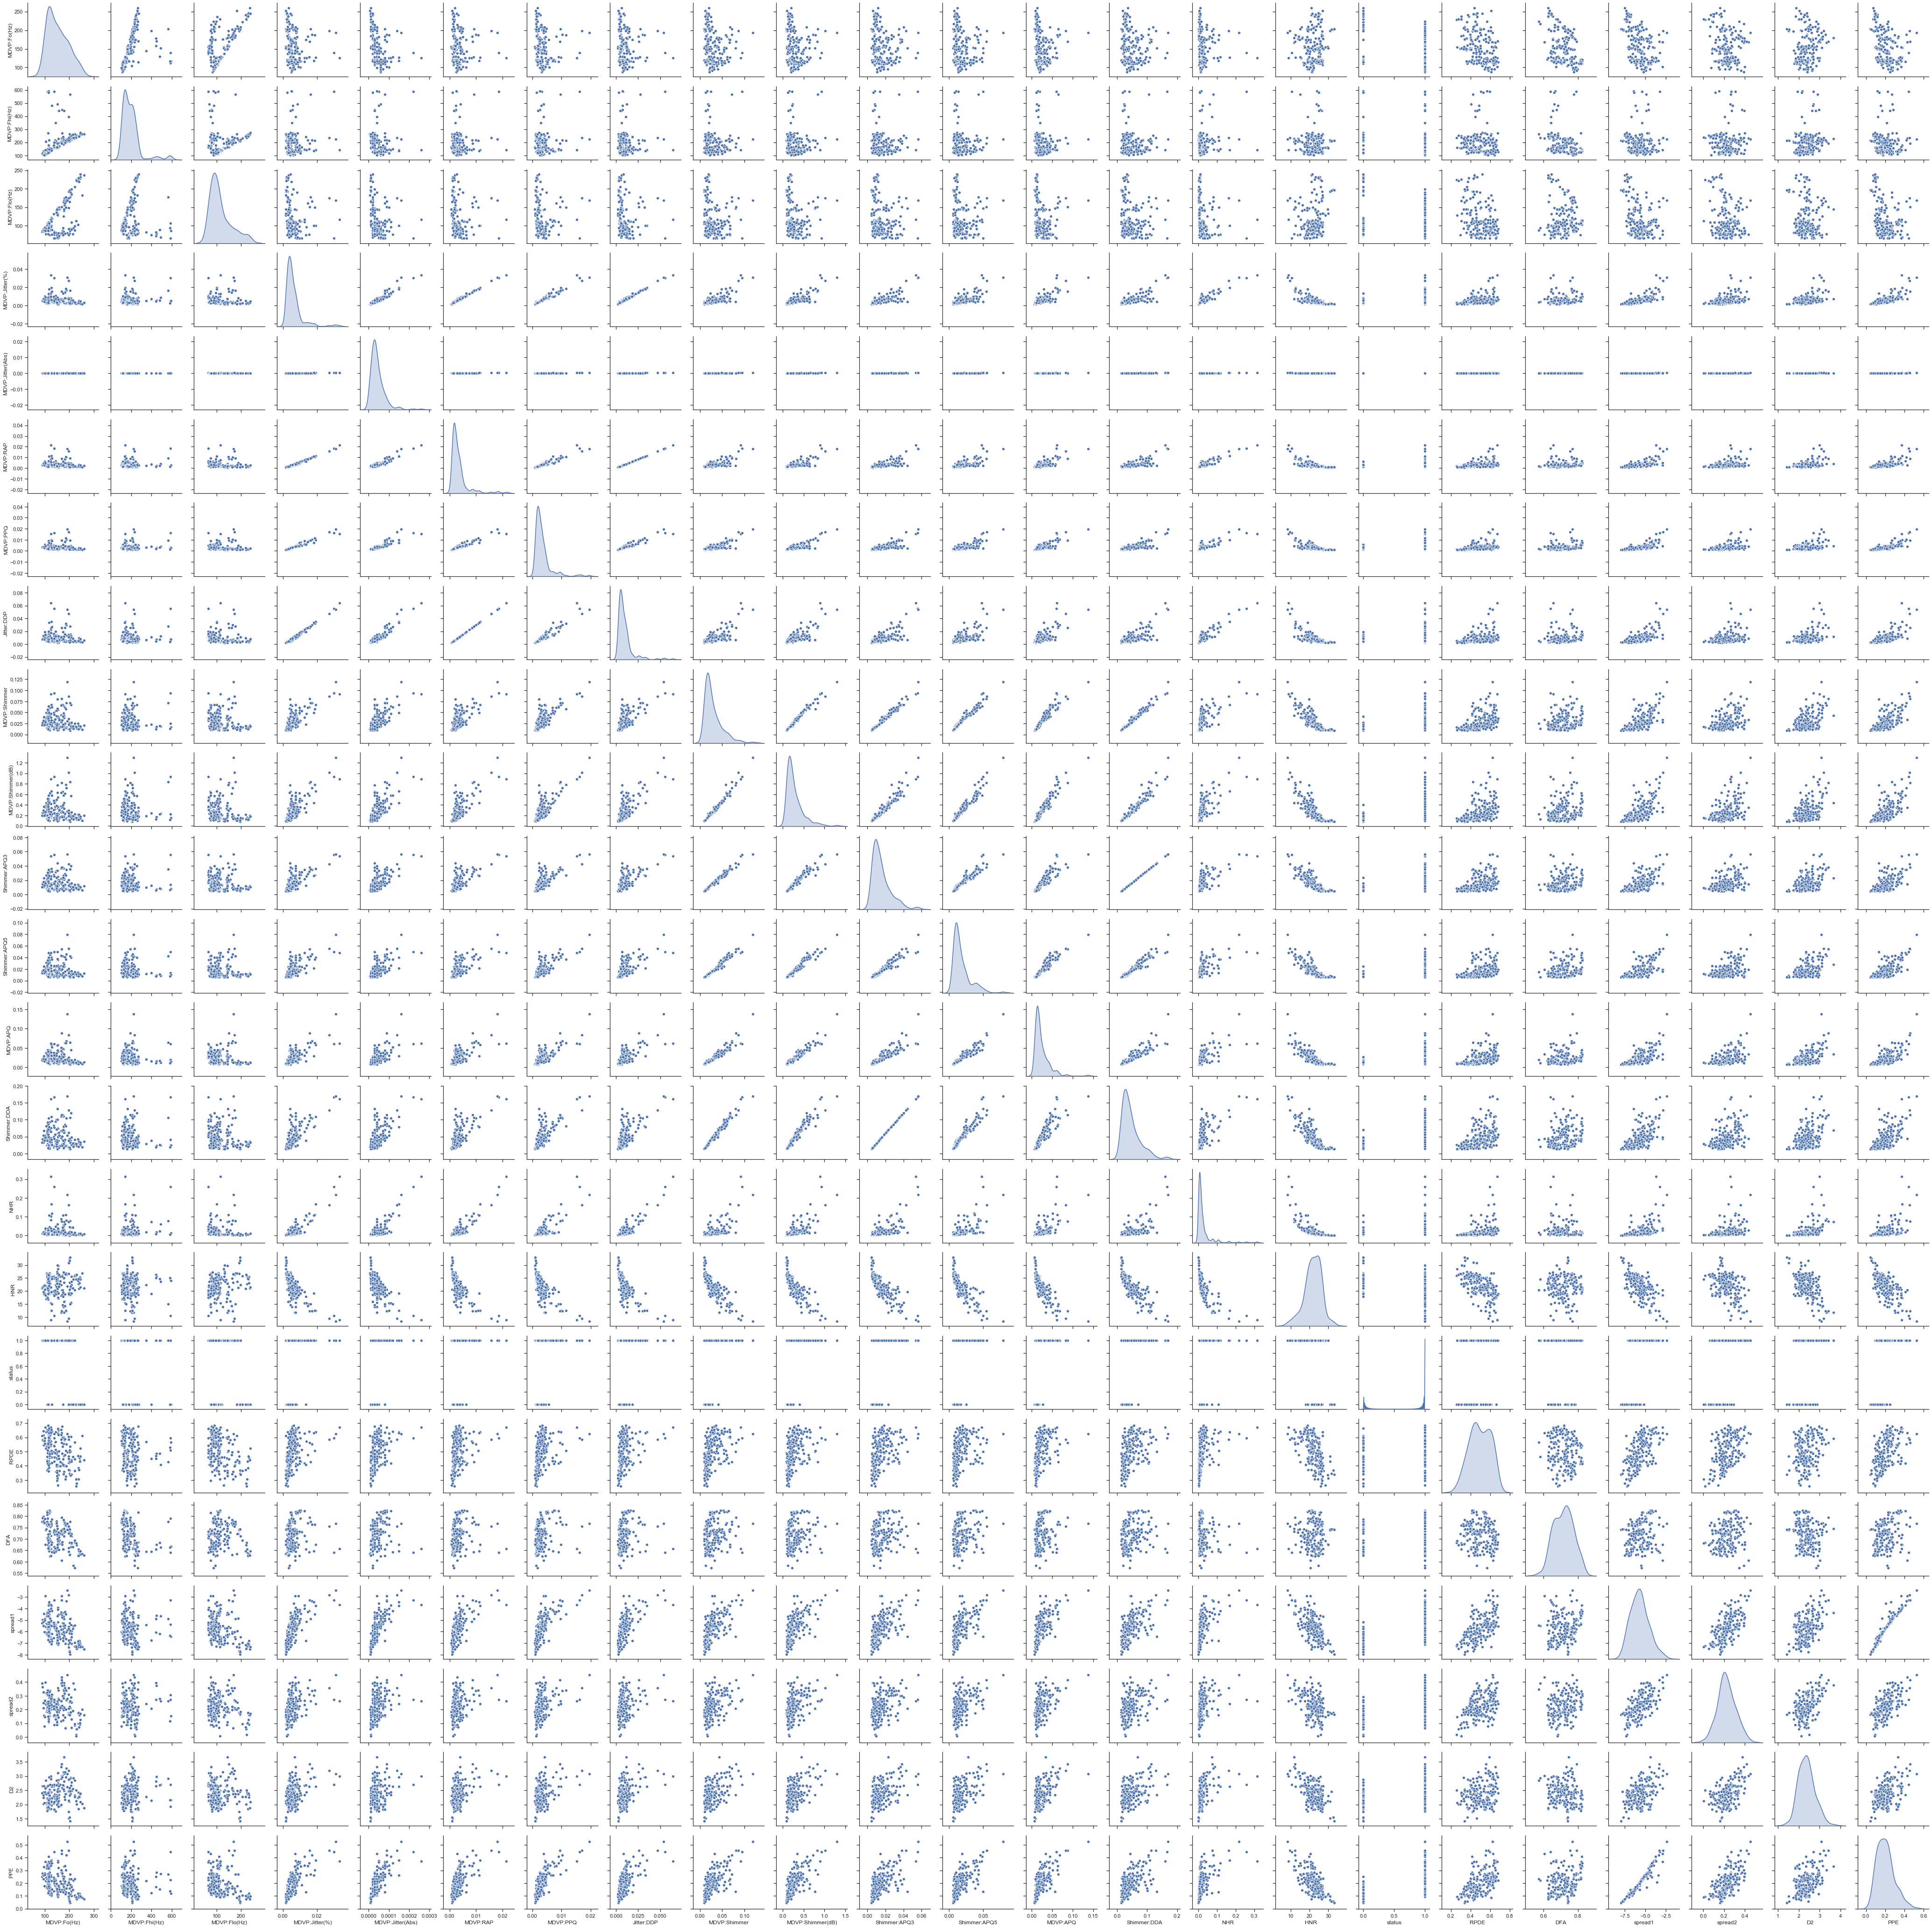

In [9]:
sns.pairplot(dataset,diag_kind='kde')

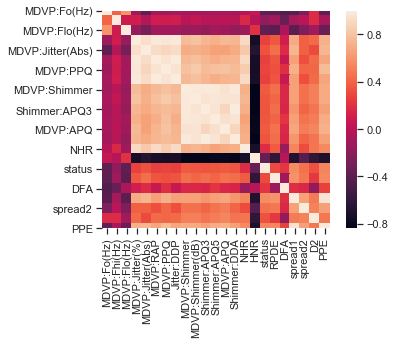

In [10]:
# Heatmap visulisation for each attribute coefficient correlation.
import seaborn as sns
corr_map=dataset.corr()
sns.heatmap(corr_map,square=True)

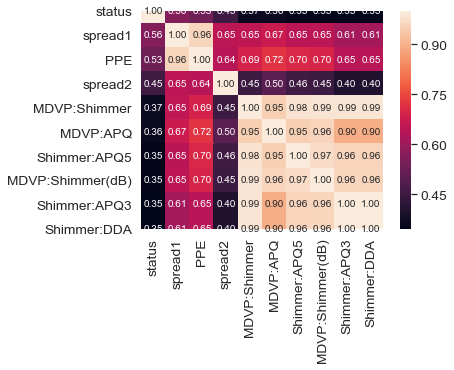

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# K value means how many features required to see in heat map
k=10

# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [12]:
# correlation coefficient values in each attributes.
correlation_values=dataset.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

# Checking Null Values

In [13]:
# Checking null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [14]:
# Checking null value sum
dataset.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#  Splitting Data into Train Set and Test Set

In [15]:
# split the dataset into input and output attribute.

y=dataset['status']
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
x=dataset.drop(cols,axis=1)

In [16]:
# Splitting the dataset into trianing and test set

train_size=0.70
test_size=0.30
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [17]:
x_train.shape

(136, 17)

In [18]:
x_train.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
12,136.926,131.276,0.00293,0.00002,0.00153,0.01259,0.112,0.00656,0.00717,0.01140,0.01968,25.703,0.460600,-6.547148,0.152813,2.041277,0.138512
130,120.289,100.209,0.00492,0.00004,0.00238,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,23.949,0.467160,-6.135296,0.203630,2.539724,0.169923
145,223.361,87.638,0.00352,0.00002,0.00188,0.02536,0.225,0.01379,0.01478,0.01909,0.04137,20.366,0.566849,-5.456811,0.345238,2.840556,0.232861
59,114.847,104.680,0.00867,0.00008,0.00520,0.03225,0.350,0.01805,0.01974,0.02519,0.05414,21.660,0.547975,-4.609161,0.221711,1.831691,0.316395
178,148.790,138.990,0.00309,0.00002,0.00186,0.01574,0.142,0.00839,0.00956,0.01309,0.02518,24.412,0.402591,-6.311987,0.182459,2.251553,0.160306


# Classification Models Without Feature Scale.

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LogisticRegression : 0.868681 (0.095720)
knn : 0.808242 (0.119180)


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

SVC : 0.788462 (0.121234)
decision_tree : 0.817033 (0.085299)
Naive Bayes : 0.711538 (0.100122)


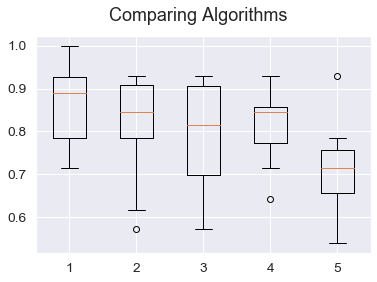

In [19]:

n_neighbors=5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

# Classification Models With Feature Scale.

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LogisticRegression : 0.868681 (0.095720)
knn : 0.808242 (0.119180)


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

SVC : 0.788462 (0.121234)
decision_tree : 0.823077 (0.080820)
Naive Bayes : 0.711538 (0.100122)


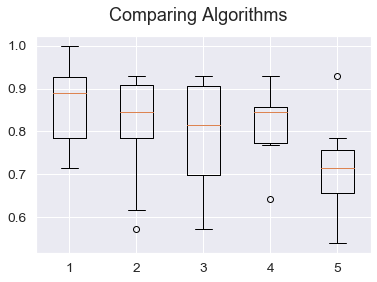

In [20]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

#Prediction we got without applying feature scaling

1.Logistic Regression Classification Algorithm : 0.859583 (0.114429)

2.K-Nearest Neighbors classification Algorithm : 0.834167 (0.118714)

3.Support Vector Machine classification Algorithm : 0.821667 (0.117951)

4.Decision Tree Classification Algorithm : 0.840000 (0.106771)

5.Naive bayes Classification Algorithm : 0.735833 (0.071715)


#Prediction we got with applying feature scaling

1.Logistic Regression Classification Algorithm : 0.859583 (0.114429)

2.K-Nearest Neighbors classification Algorithm : 0.834167 (0.118714)

3.Support Vector Machine classification Algorithm : 0.821667 (0.117951)

4.Decision Tree Classification Algorithm : 0.865833 (0.076508)

5.Naive bayes Classification Algorithm : 0.735833 (0.071715)

As per above accuracy we are going to pickup top 2 best performance algorithms.

Decision Tree Classification Algorithm

Logistic Regression Classification Algorithm

In [21]:
# Decision Tree Tunning Algorithms
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=DecisionTreeClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.838235 using {} 


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
# Logistic Regression Tuning Algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param_grid=dict(C=c)
model=LogisticRegression()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Best: 0.838235 using {'C': 0.6} 


After Applying Tuning to top 2 algorithms.

Decision Tree Classification Algorithm Best: 0.838235 using {}

Logistic Regression Classification Algorithm Best: 0.838235 using {'C': 0.6}

scaledAB : 0.839560 (0.081896)
scaledGBC : 0.883516 (0.064067)
scaledRFC : 0.882418 (0.047913)
scaledETC : 0.897802 (0.033259)


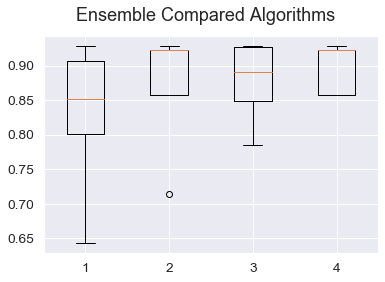

In [22]:
#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Bagging methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('scaledGBC',Pipeline([('scale',StandardScaler()),('GBc',GradientBoostingClassifier())])))
ensembles.append(('scaledRFC',Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',StandardScaler()),('ETC',ExtraTreesClassifier(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

We got accuracy for ensemble algorithms likewise...

Ada Boost Classification Algorithm : 0.839560 (0.081896)
    
Gradient Boosting Classification Algorithm : 0.883516 (0.064067)
    
Random Forest Classification Algorithm : 0.882418 (0.047913)
    
Extra Trees Classification Algoriothm :  0.897802 (0.033259)
    

In [23]:
# GradientBoosting ClassifierTuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50,100,150,200,250,300]
learning_rate=[0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid=dict(n_estimators=n_estimators,learning_rate=learning_rate)
model=GradientBoostingClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.897059 using {'learning_rate': 0.1, 'n_estimators': 40} 


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
# Extra Trees Classifier Classifier Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50,100,150,200]
param_grid=dict(n_estimators=n_estimators)
model=ExtraTreesClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.904412 using {'n_estimators': 30} 


C:\Users\kishore\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


After applying tuning to top 2 ensemble algorithms we got accuracy like

Gradient Boosting Classification Algorithm 0.897059 using {'learning_rate': 0.1, 'n_estimators': 40} 

Extra Trees Classification Algoriothm 0.904412 using {'n_estimators': 30} 

# Comparing all 4 algorithms top 2 algorithm and top 2 ensemble algorithms.


Decision Tree Classification Algorithm Best: 0.838235 using {}
    
Logistic Regression Classification Algorithm Best: 0.838235 using {'C': 0.6}
    
Gradient Boosting Classification Algorithm 0.897059 using {'learning_rate': 0.1, 'n_estimators': 40} 

Extra Trees Classification Algoriothm 0.904412 using {'n_estimators': 30}

# Extra Trees Classification Algoriothm 0.904412 using {'n_estimators': 30}giving the best accuracy performance so we are going to use this ensemble algorithm to fit and predict our dataset